In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:

data_train_full = "KDDTrain+.txt"
data_test_full = "KDDTest+.txt"

In [3]:
df_train_full = pd.read_csv(data_train_full)
df_test_full = pd.read_csv(data_test_full)
df_train_full.head()

0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0  0  udp    other   SF  146     0    0    0    0    0    0    0    0    0   
1  0  tcp  private   S0    0     0    0    0    0    0    0    0    0    0   
2  0  tcp     http   SF  232  8153    0    0    0    0    0    1    0    0   
3  0  tcp     http   SF  199   420    0    0    0    0    0    1    0    0   
4  0  tcp  private  REJ    0     0    0    0    0    0    0    0    0    0   

   0.10  0.11  0.12  0.13  0.14  0.15  0.16  0.17    2  2.1  0.00  0.00.1  \
0     0     0     0     0     0     0     0     0   13    1   0.0     0.0   
1     0     0     0     0     0     0     0     0  123    6   1.0     1.0   
2     0     0     0     0     0     0     0     0    5    5   0.2     0.2   
3     0     0     0     0     0     0     0     0   30   32   0.0     0.0   
4     0     0     0     0     0     0     0     0  121   19   0.0     0.0   

   0.00.2  0.00.3  1.00  0.00.4  0.00.5  150   25  0.17.1  0.03  0.17.2  \
0     0.0     0.0  0.08    0.15    0.00  255    1    0.00  0.60    0.88   
1     0.0     0.0  0.05    0.07    0.00  255   26    0.10  0.05    0.00   
2     0.0     0.0  1.00    0.00    0.00   30  255    1.00  0.00    0.03   
3     0.0     0.0  1.00    0.00    0.09  255  255    1.00  0.00    0.00   
4     1.0     1.0  0.16    0.06    0.00  255   19    0.07  0.07    0.00   

   0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0    0.00    0.00    0.00   0.0    0.00   normal  15  
1    0.00    1.00    1.00   0.0    0.00  neptune  19  
2    0.04    0.03    0.01   0.0    0.01   normal  21  
3    0.00    0.00    0.00   0.0    0.00   normal  21  
4    0.00    0.00    0.00   1.0    1.00  neptune  21

In [4]:
NSL_KDD_columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'classnum']

In [5]:
df_train_full.columns = NSL_KDD_columns
df_test_full.columns = NSL_KDD_columns

In [6]:
from scipy.stats import zscore
df = zscore(df_train_full['classnum'])


In [7]:
print("Z-score Calculation based on class to check outliers")
df

Z-score Calculation based on class to check outliers


array([-1.96554725, -0.21996766,  0.65282213, ..., -0.65636256,
        0.21642723,  0.65282213])

In [8]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
duration                       125972 non-null int64
protocol_type                  125972 non-null object
service                        125972 non-null object
flag                           125972 non-null object
src_bytes                      125972 non-null int64
dst_bytes                      125972 non-null int64
land                           125972 non-null int64
wrong_fragment                 125972 non-null int64
urgent                         125972 non-null int64
hot                            125972 non-null int64
num_failed_logins              125972 non-null int64
logged_in                      125972 non-null int64
num_compromised                125972 non-null int64
root_shell                     125972 non-null int64
su_attempted                   125972 non-null int64
num_root                       125972 non-null int64
num_file_creations             125972 

In [9]:
df_test_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
duration                       22543 non-null int64
protocol_type                  22543 non-null object
service                        22543 non-null object
flag                           22543 non-null object
src_bytes                      22543 non-null int64
dst_bytes                      22543 non-null int64
land                           22543 non-null int64
wrong_fragment                 22543 non-null int64
urgent                         22543 non-null int64
hot                            22543 non-null int64
num_failed_logins              22543 non-null int64
logged_in                      22543 non-null int64
num_compromised                22543 non-null int64
root_shell                     22543 non-null int64
su_attempted                   22543 non-null int64
num_root                       22543 non-null int64
num_file_creations             22543 non-null int64
num_

In [10]:
df_train_full.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [11]:
df_test_full.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [12]:
df_train_full.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
df_test_full.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
NSL_KDD_columns_categorical = ['protocol_type', 'service', 'flag', 'class']

NSL_KDD_columns_int = ['duration',  'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count',  'dst_host_count',
       'dst_host_srv_count',   'classnum']

NSL_KDD_columns_float = ['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
        'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate',
        'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
        'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
        'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
        'dst_host_srv_rerror_rate']

<AxesSubplot:xlabel='protocol_type', ylabel='occurances'>

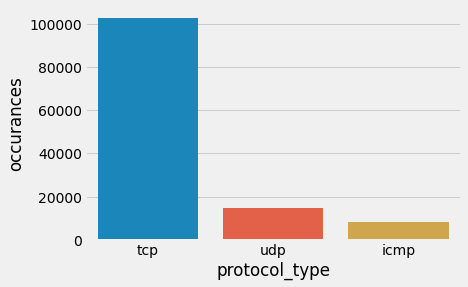

In [15]:
from sklearn.feature_selection import SelectKBest
temp = df_train_full['protocol_type'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['protocol_type', 'occurances'])
sns.barplot(data=d, x='protocol_type', y='occurances')

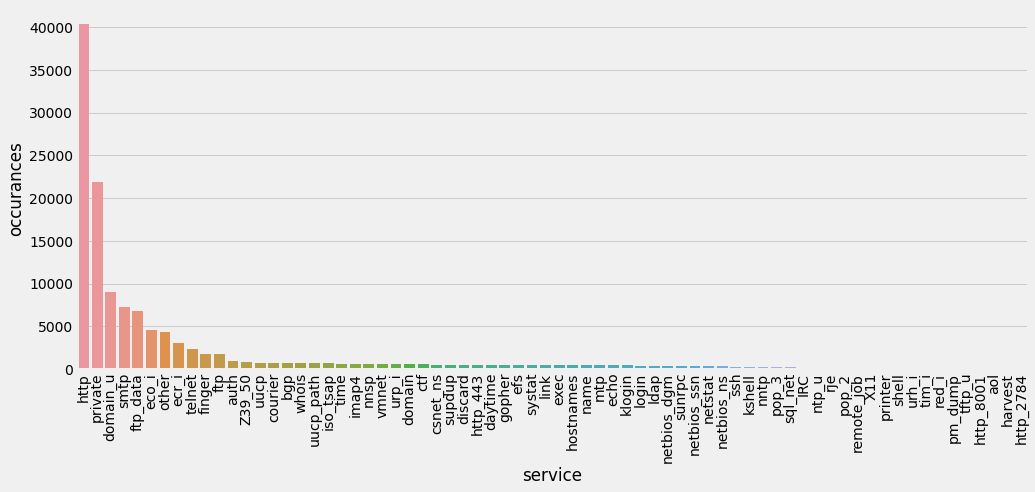

In [16]:

temp = df_train_full['service'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['service', 'occurances'])
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=d, x='service', y='occurances')
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()
#ax.set_xlabel()
#ax.set_ylabel()

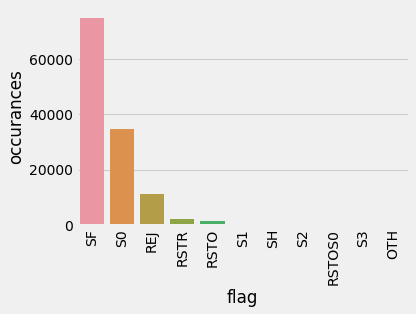

In [17]:

temp = df_train_full['flag'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['flag', 'occurances'])
fig, ax = plt.subplots()
sns.barplot(data=d, x='flag', y='occurances')
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

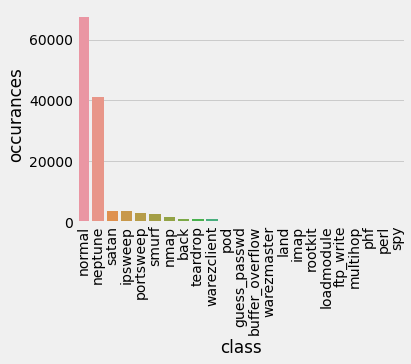

In [18]:
# categorical feature 'class'
temp = df_train_full['class'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['class', 'occurances'])
fig, ax = plt.subplots()
sns.barplot(data=d, x='class', y='occurances')
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [19]:
print(df_train_full[NSL_KDD_columns_int].nunique())

duration              2981
src_bytes             3341
dst_bytes             9326
land                     2
wrong_fragment           3
urgent                   4
hot                     28
num_failed_logins        6
logged_in                2
num_compromised         88
root_shell               2
su_attempted             3
num_root                82
num_file_creations      35
num_shells               3
num_access_files        10
num_outbound_cmds        1
is_host_login            2
is_guest_login           2
count                  512
srv_count              509
dst_host_count         256
dst_host_srv_count     256
classnum                22
dtype: int64


In [20]:

list1 = ['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 
         'logged_in', 'root_shell', 'su_attempted', 'num_shells', 
         'num_outbound_cmds', 'is_host_login', 'is_guest_login']



list2 = ['duration', 'src_bytes','dst_bytes', 'hot', 
         'num_compromised', 'num_root', 'num_file_creations', 
         'num_access_files', 'count', 'srv_count', 'dst_host_count', 
         'dst_host_srv_count', 'classnum']



In [21]:


for i in list1:
    print('feature name:',i,'\n', df_train_full[i].value_counts(ascending=False), '\n\n\n')

feature name: land 
 0    125947
1        25
Name: land, dtype: int64 



feature name: wrong_fragment 
 0    124882
3       884
1       206
Name: wrong_fragment, dtype: int64 



feature name: urgent 
 0    125963
1         5
2         3
3         1
Name: urgent, dtype: int64 



feature name: num_failed_logins 
 0    125850
1       104
2         9
3         5
4         3
5         1
Name: num_failed_logins, dtype: int64 



feature name: logged_in 
 0    76120
1    49852
Name: logged_in, dtype: int64 



feature name: root_shell 
 0    125803
1       169
Name: root_shell, dtype: int64 



feature name: su_attempted 
 0    125892
2        59
1        21
Name: su_attempted, dtype: int64 



feature name: num_shells 
 0    125925
1        42
2         5
Name: num_shells, dtype: int64 



feature name: num_outbound_cmds 
 0    125972
Name: num_outbound_cmds, dtype: int64 



feature name: is_host_login 
 0    125971
1         1
Name: is_host_login, dtype: int64 



feature name: is_guest

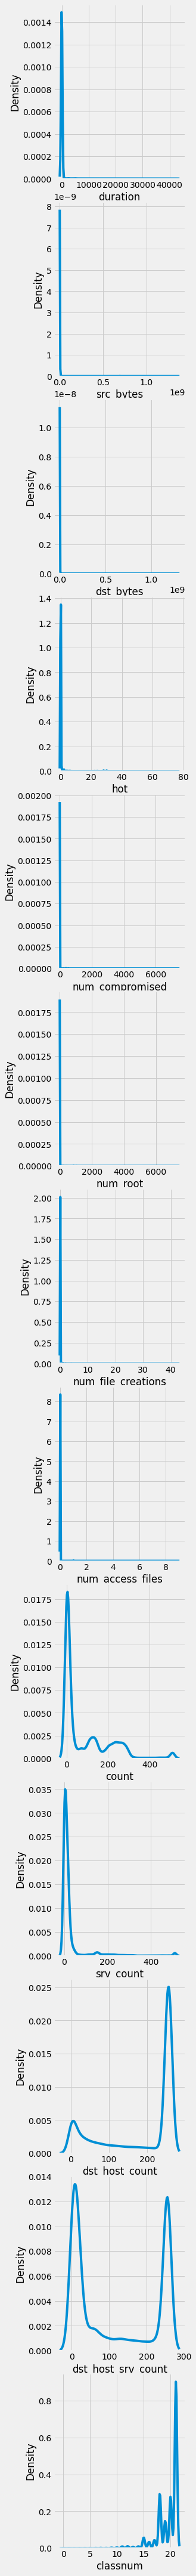

In [22]:

temp = df_train_full[list2]
fig, ax = plt.subplots(13, 1, figsize=(4, 60))
fig.tight_layout()
for i, j in enumerate (list2):
    sns.kdeplot(ax=ax[i], data=temp, x=j)
plt.show()

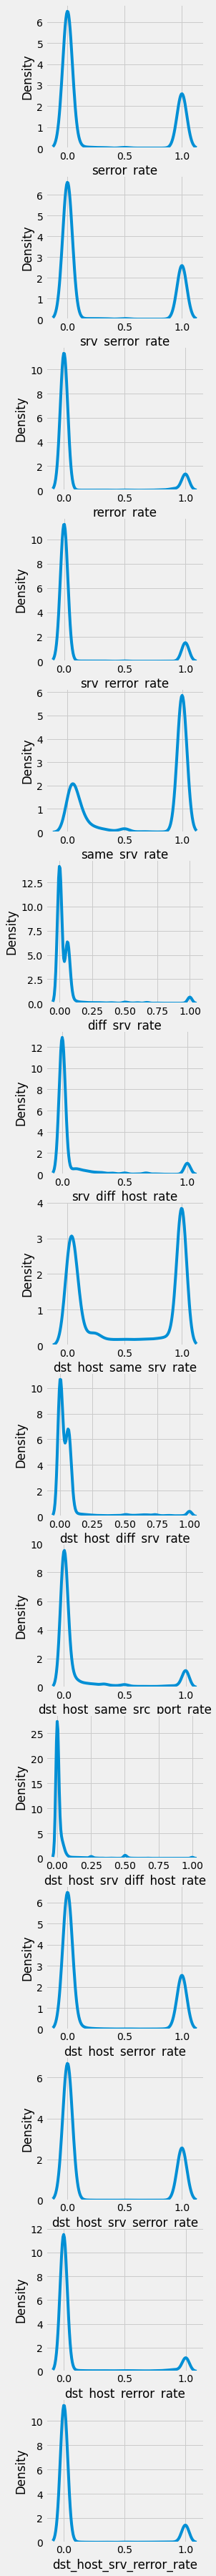

In [23]:

fig, ax = plt.subplots(15, 1, figsize=(4, 50))
fig.tight_layout()

for i, j in enumerate (NSL_KDD_columns_float):
    sns.kdeplot(ax=ax[i], data=df_train_full, x=j)
plt.show()

In [24]:
DoS_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
Probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']


In [25]:
df_train_full['class'].replace(['apache2','back','land','neptune','mailbomb','pod',
                                'processtable','smurf','teardrop','udpstorm','worm'], 
                                'DoS_attack', inplace=True)
df_train_full['class'].replace(['ipsweep','mscan','nmap','portsweep','saint','satan'], 
                                'Probe_attacks', inplace=True)
df_train_full['class'].replace(['buffer_overflow','loadmodule','perl','ps','rootkit',
                                'sqlattack','xterm'], 'U2R', inplace=True)
df_train_full['class'].replace(['ftp_write','guess_passwd','http_tunnel','imap',
                                'multihop','named','phf','sendmail','snmpgetattack',
                                'snmpguess','spy','warezclient','warezmaster','xclock',
                                'xsnoop'], 'R2L', inplace=True)
df_train_full['class'].replace('normal', 'Normal', inplace=True)

In [26]:
df_train_full['class']

0                Normal
1            DoS_attack
2                Normal
3                Normal
4            DoS_attack
5            DoS_attack
6            DoS_attack
7            DoS_attack
8            DoS_attack
9            DoS_attack
10           DoS_attack
11               Normal
12                  R2L
13           DoS_attack
14           DoS_attack
15               Normal
16        Probe_attacks
17               Normal
18               Normal
19           DoS_attack
20           DoS_attack
21               Normal
22               Normal
23           DoS_attack
24               Normal
25           DoS_attack
26               Normal
27               Normal
28               Normal
29        Probe_attacks
30           DoS_attack
31               Normal
32        Probe_attacks
33               Normal
34               Normal
35               Normal
36           DoS_attack
37               Normal
38           DoS_attack
39           DoS_attack
40           DoS_attack
41              

In [27]:
df_train_full.drop(df_train_full[(df_train_full['class']=='R2L')].index,inplace=True)
df_train_full.drop(df_train_full[(df_train_full['class']=='DoS_attack')].index,inplace=True)
df_train_full.drop(df_train_full[(df_train_full['class']=='Probe_attacks')].index,inplace=True)


df_test_full.drop(df_train_full[(df_train_full['class']=='R2L')].index,inplace=True)
df_test_full.drop(df_train_full[(df_train_full['class']=='DoS_attack')].index,inplace=True)
df_test_full.drop(df_train_full[(df_train_full['class']=='Probe_attacks')].index,inplace=True)
df_train_full[(df_train_full['class']=='Normal')].head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0          0           udp   other   SF        146          0     0   
2          0           tcp    http   SF        232       8153     0   
3          0           tcp    http   SF        199        420     0   
11         0           tcp    http   SF        287       2251     0   
15         0           tcp    http   SF        300      13788     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0                0       0    0                  0          0   
2                0       0    0                  0          1   
3                0       0    0                  0          1   
11               0       0    0                  0          1   
15               0       0    0                  0          1   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
0                 0           0             0         0                   0   
2                 0           0             0         0                   0   
3                 0           0             0         0                   0   
11                0           0             0         0                   0   
15                0           0             0         0                   0   

    num_shells  num_access_files  num_outbound_cmds  is_host_login  \
0            0                 0                  0              0   
2            0                 0                  0              0   
3            0                 0                  0              0   
11           0                 0                  0              0   
15           0                 0                  0              0   

    is_guest_login  count  srv_count  serror_rate  srv_serror_rate  \
0                0     13          1          0.0             0.00   
2                0      5          5          0.2             0.20   
3                0     30         32          0.0             0.00   
11               0      3          7          0.0             0.00   
15               0      8          9          0.0             0.11   

    rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  \
0           0.0              0.0           0.08           0.15   
2           0.0              0.0           1.00           0.00   
3           0.0              0.0           1.00           0.00   
11          0.0              0.0           1.00           0.00   
15          0.0              0.0           1.00           0.00   

    srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0                 0.00             255                   1   
2                 0.00              30                 255   
3                 0.09             255                 255   
11                0.43               8                 219   
15                0.22              91                 255   

    dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                      0.0                     0.6   
2                      1.0                     0.0   
3                      1.0                     0.0   
11                     1.0                     0.0   
15                     1.0                     0.0   

    dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                          0.88                         0.00   
2                          0.03                         0.04   
3                          0.00                         0.00   
11                         0.12                         0.03   
15                         0.01                         0.02   

    dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.00                      0.00                   0.0   
2                   0.03                      0.01                   0.0   
3                   0.00                      0.00                   0.0   
11                  0.00                      0.00                   0.0   
15       

In [28]:
df_train_full['class'].value_counts()
df_train_full.rename(columns={'class':'Label'},inplace=True)
df_test_full.rename(columns={'class':'Label'},inplace=True)

In [29]:
Trained_attack = df_train_full.Label.map(lambda a: 0 if a == 'Normal' else 1)
Test_attack=df_test_full.Label.map(lambda a: 0 if a == 'Normal' else 1)

df_train_full['Label'] = Trained_attack
df_test_full['Label'] = Test_attack


In [30]:
df_train_full['Label']

0         0
2         0
3         0
11        0
15        0
17        0
18        0
21        0
22        0
24        0
26        0
27        0
28        0
31        0
33        0
34        0
35        0
37        0
41        0
42        0
43        0
46        0
49        0
52        0
53        0
54        0
58        0
59        0
62        0
64        0
69        0
71        0
72        0
74        0
76        0
77        0
79        0
83        0
85        0
88        0
89        0
90        0
91        0
94        0
95        0
96        0
97        0
99        0
100       0
101       0
102       0
104       0
105       0
106       0
107       0
108       0
109       0
110       0
111       0
112       0
113       0
116       0
117       0
118       0
122       0
124       0
125       0
126       0
127       0
128       0
131       0
132       0
135       0
136       0
139       0
142       0
143       0
144       0
146       0
150       0
154       0
155       0
159       0
160 

C:\Users\chand\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\chand\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\chand\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.ro

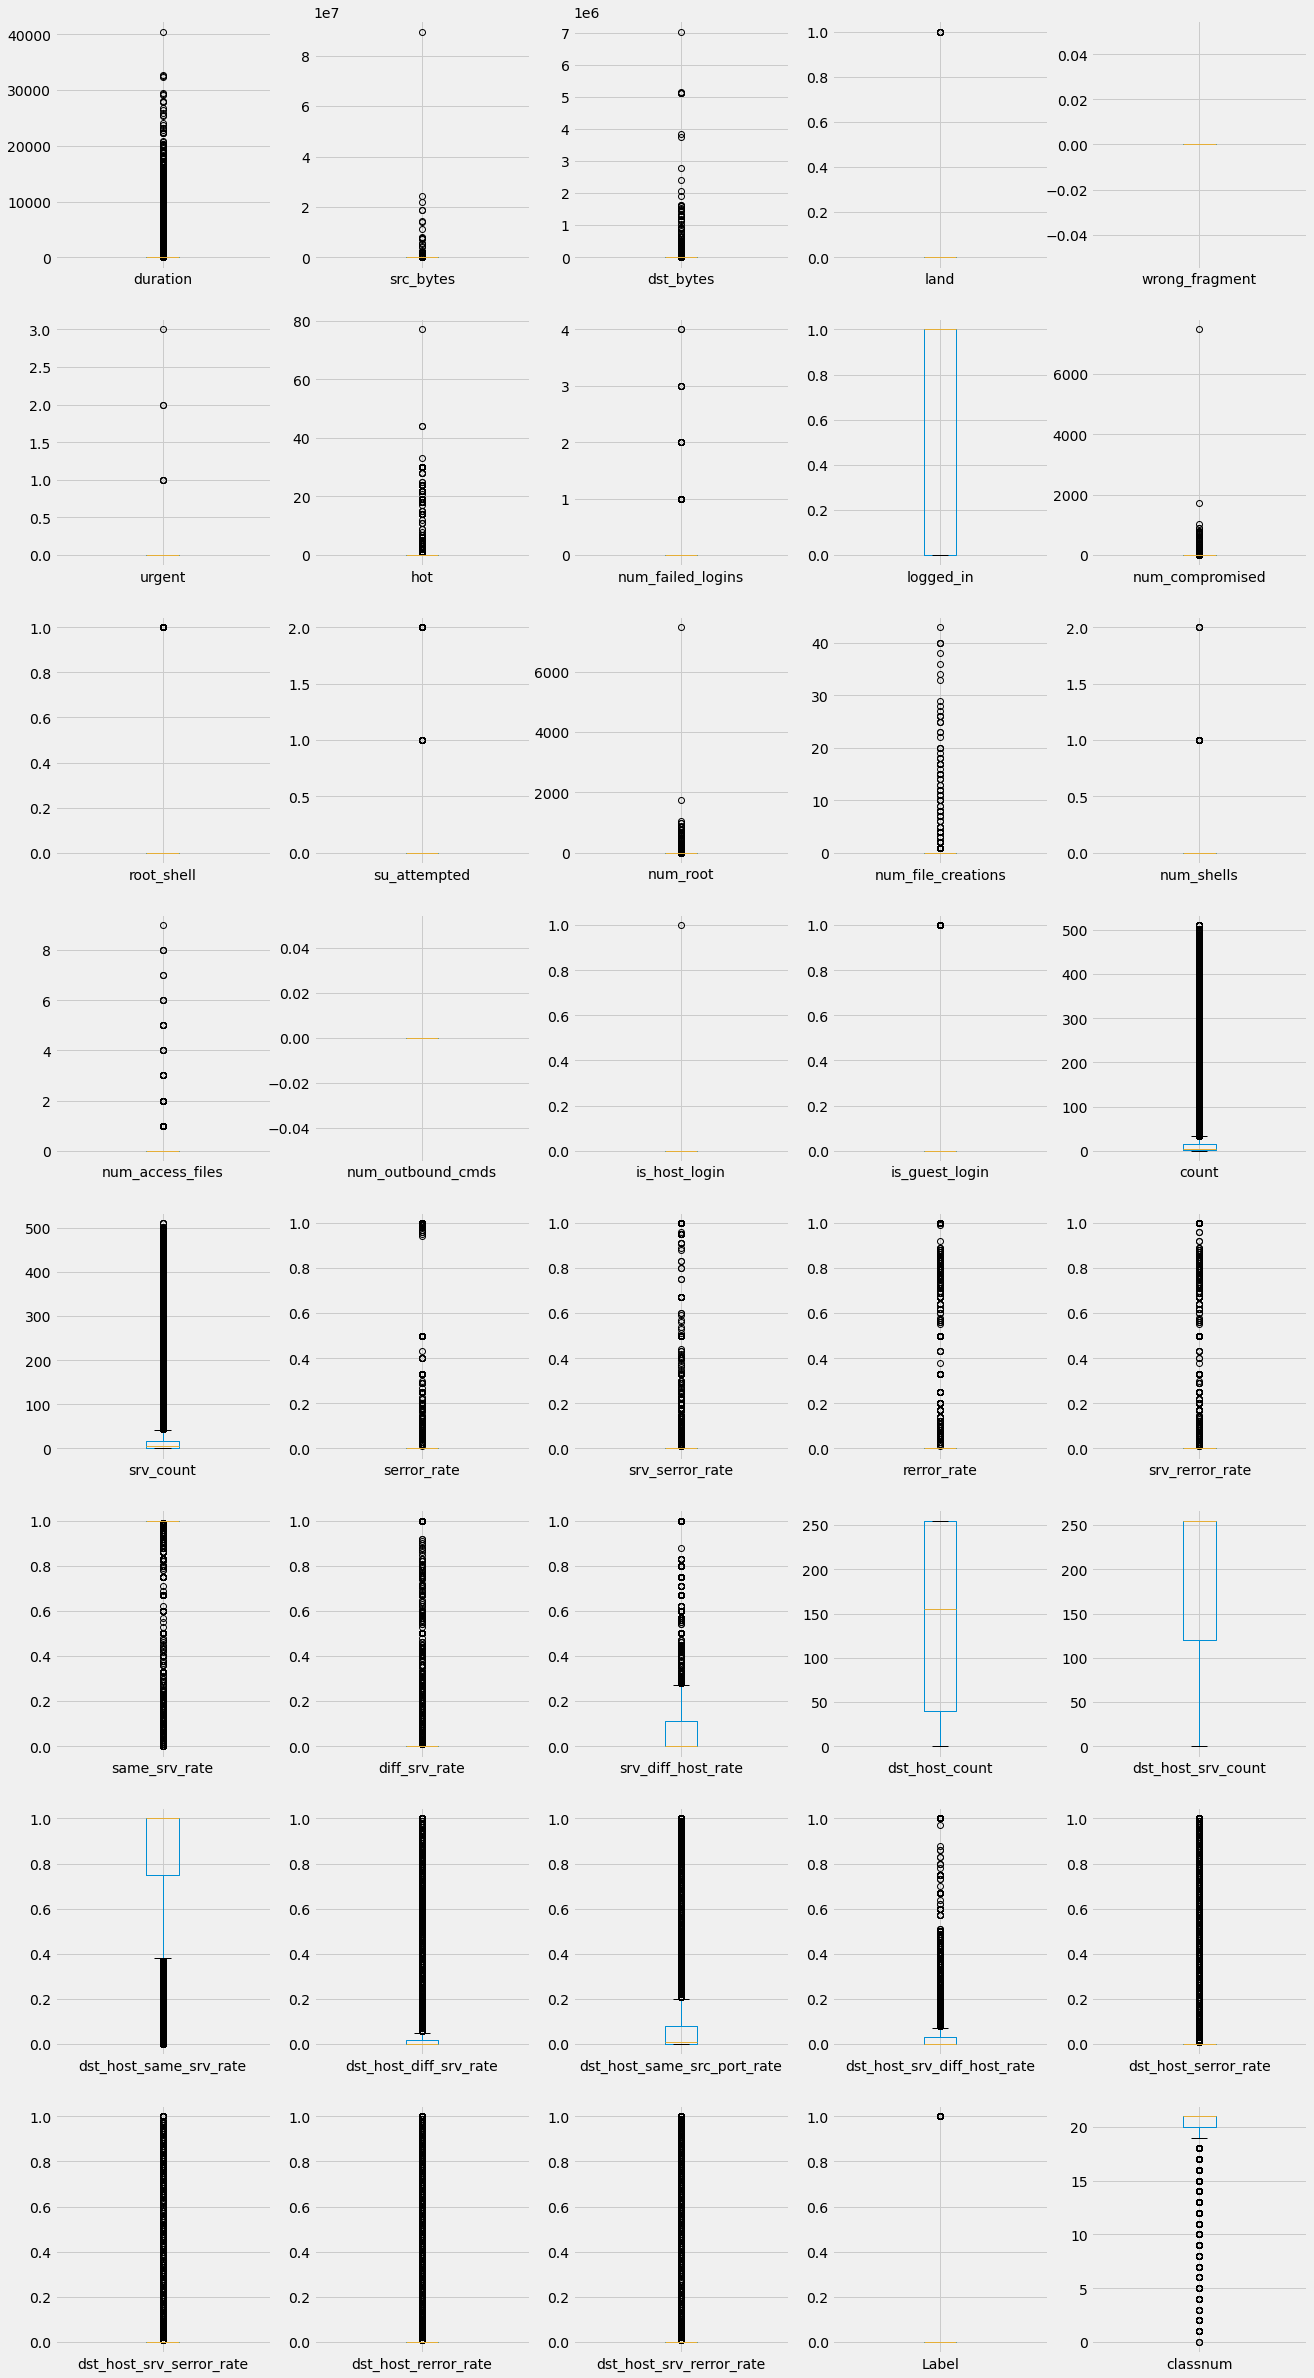

In [31]:
df_train_full.plot(kind='box',subplots=1,layout=(8,5),figsize=(20,40))
plt.show()

In [32]:
df_train_full.select_dtypes(['object']).columns

Index(['protocol_type', 'service', 'flag'], dtype='object')

In [33]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'Label']
for x in clm:
    df_train_full[x]=le.fit_transform(df_train_full[x])
    df_test_full[x]=le.fit_transform(df_test_full[x])
    

In [34]:
from sklearn.metrics import accuracy_score,f1_score

x_train=df_train_full.drop('Label',axis=1)
y_train=df_train_full["Label"]

x_test=df_test_full.drop('Label',axis=1)
y_test=df_test_full["Label"]

In [35]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

flag                           0.015513
same_srv_rate                  0.014984
classnum                       0.014317
protocol_type                  0.010332
service                        0.008085
logged_in                      0.007884
dst_host_same_srv_rate         0.006516
dst_host_srv_count             0.005750
dst_host_count                 0.003889
root_shell                     0.002078
hot                            0.001820
duration                       0.001751
src_bytes                      0.001653
num_file_creations             0.001438
num_compromised                0.001215
dst_host_same_src_port_rate    0.001107
dst_bytes                      0.000774
srv_count                      0.000755
count                          0.000655
srv_diff_host_rate             0.000469
num_root                       0.000406
dst_host_srv_diff_host_rate    0.000362
dst_host_srv_rerror_rate       0.000310
dst_host_diff_srv_rate         0.000182
num_shells                     0.000165


In [36]:
def select():
    best_one=[]
    if(len(val_list)>1):
        best_values=sorted_value(val_list/2)
        for i in best_values:
            best_one.append(pop_lst(value_list[i]))
        return best_one   
    
sel_five_cols = SelectKBest(mutual_info_classif, k='all')
sel_five_cols.fit(x_train, y_train)

    
print("The selected features Are:")  

The selected features Are:


In [37]:
x_train.columns[sel_five_cols.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'classnum'],
      dtype='object')

In [38]:
col=['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate']
x_train=x_train[col]
x_test=x_test[col]

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

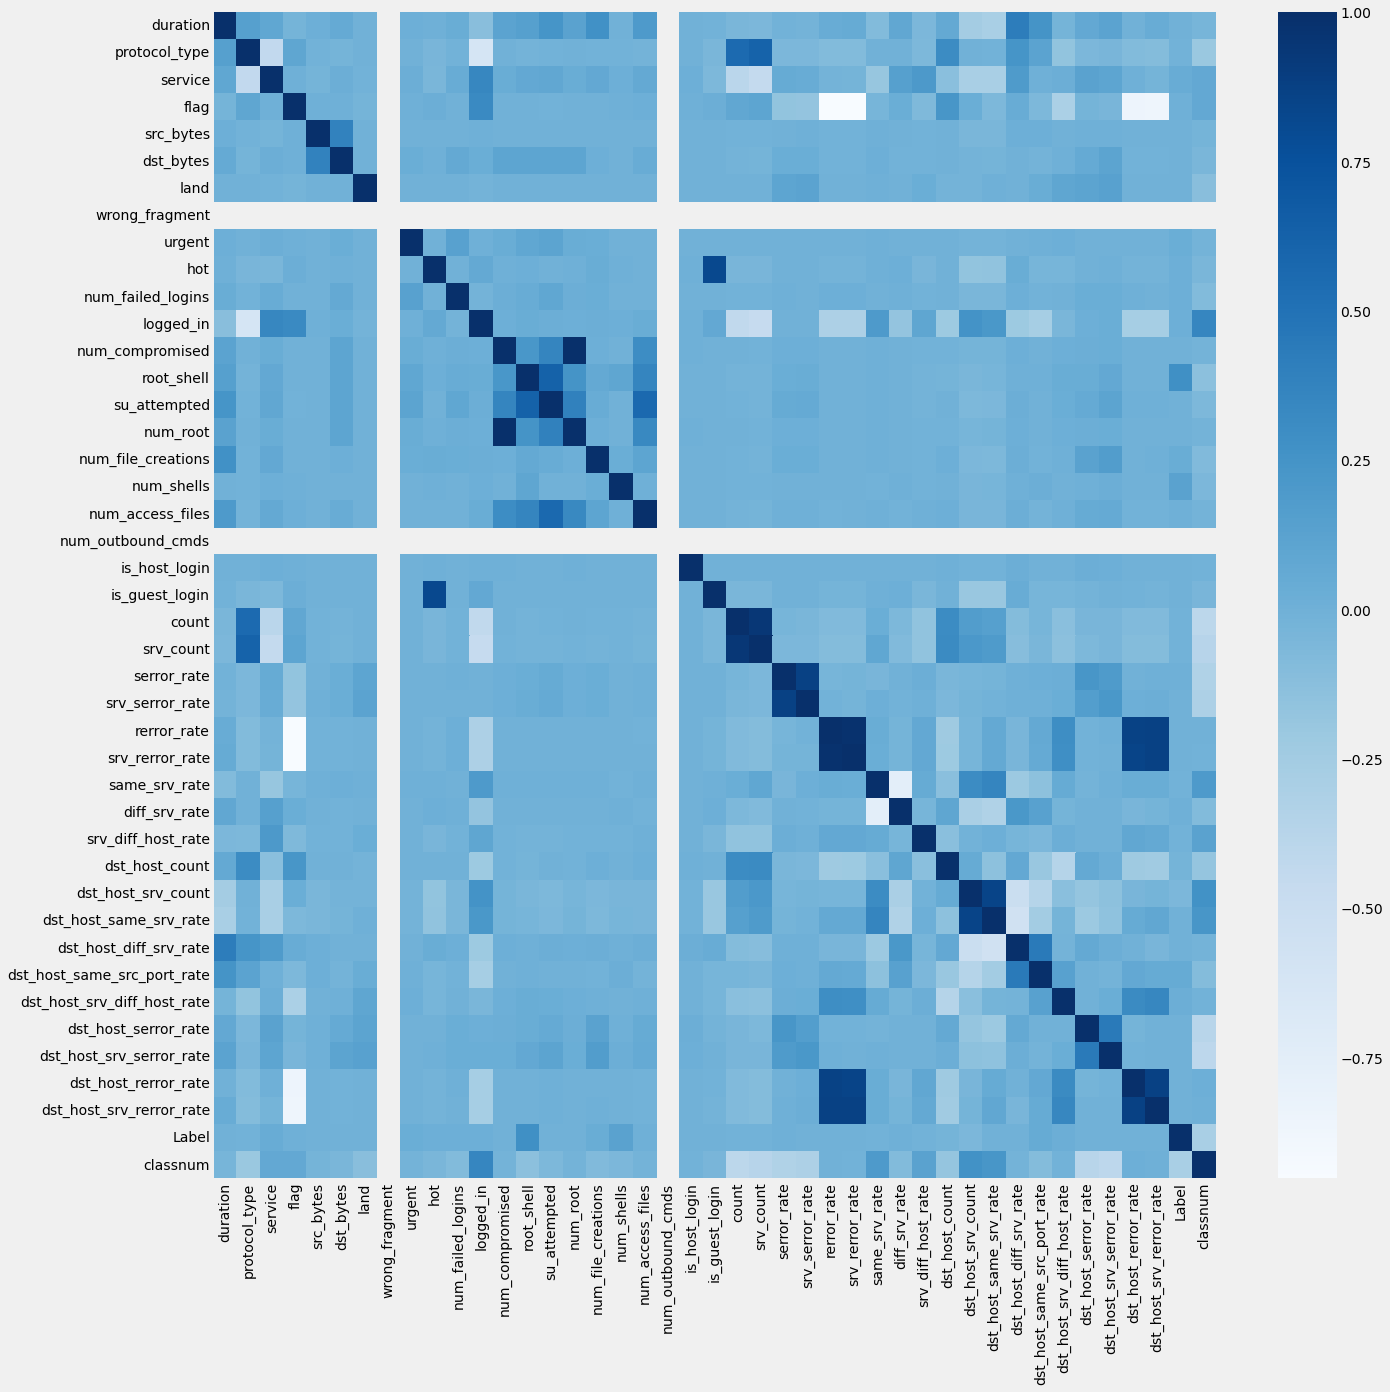

In [40]:

corr_matrix = df_train_full.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))

h_map=sns.heatmap(df_train_full[top_corr_features].corr(), cmap="Blues")

In [41]:

ac=[]
f=[]


import tensorflow as tf
from lib.utils import *
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=10,
        output_dim=64,
      
        mask_zero=True),
    tf.keras.layers.Bidirectional(layers.LSTM(64)), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(1)])
import tensorflow as tf
import keras
from keras import layers
model = Sequential()
model.add(layers.Dense(20, input_dim=10, activation='relu'))
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()
classifier_nn = model.fit(x_train,y_train,
                    epochs=2,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=15)


f.append(f1_score(model,y_test,sample_weight=0.2))








C:\Users\chand\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\chand\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\chand\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\chand\AppD

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              11264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1025      
Total params: 16,815
Trainable params: 14,767
Non-trainable params: 2,048
_________________________________________________________________
Tr

In [42]:
from sklearn.metrics import *
from lib.utils import *

In [43]:
from sklearn.svm import SVC
model=SVC(gamma='auto')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred,y_test,sample_weight=0.4)*100)

94.44


C:\Users\chand\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


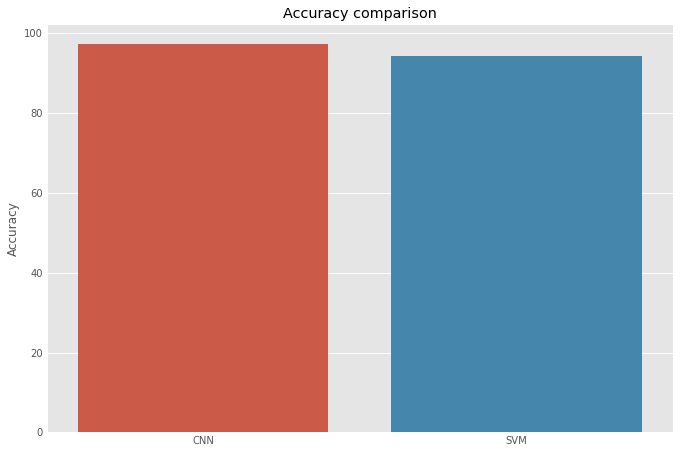

In [44]:
x=['CNN','SVM']
import matplotlib as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,7)


y=[99.5,94.44]
import numpy as np
import seaborn as sns
ax=sns.barplot(x,y)
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')

low = min(y)
high = max(y)